In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score

customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');


# transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
# transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# transactions = pd.get_dummies(transactions, columns=['supplier_code']);

# features = ['quantity', 'price'] + [col for col in transactions.columns if col.startswith('supplier_code_')];

# tree.fit(X = transactions[features], y = transactions['late'])

# plt.figure(figsize=(25,20))
# plot_tree(tree, feature_names=features, class_names=['on time','late'], filled=True)
# plt.tight_layout
# plt.show()


# y_pred = tree.predict(transactions[features])
# y_true = transactions['late']
# cm = confusion_matrix(y_true, y_pred)
# cm_transposed = cm.T

# disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
#                              display_labels=['on time', 'late'])

# # Create a figure and plot
# fig, ax = plt.subplots(figsize=(8, 6))
# disp.plot(ax=ax, cmap='Blues')
# plt.xlabel('True label')  # This will now be on the x-axis
# plt.ylabel('Predicted label')  # This will now be on the y-axis
# plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
# plt.show()

# accuracy_score(y_true = y_true , y_pred = y_pred);
# precision_score(y_true = y_true , y_pred = y_pred);
# recall_score(y_true = y_true , y_pred = y_pred);

In [ ]:
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

In [3]:
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

In [16]:
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

transactions2 = pd.get_dummies(transactions, columns=['Weekday'])

In [17]:
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

In [18]:
transactions2.columns

Index(['customer', 'material_code', 'warehouse_code', 'logistic_partner_code',
       'order_date', 'requested_date', 'received_date', 'quantity', 'price',
       'id', 'late', 'Weekday_Friday', 'Weekday_Monday', 'Weekday_Saturday',
       'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday',
       'Weekday_Wednesday', 'Months_April', 'Months_August', 'Months_December',
       'Months_February', 'Months_January', 'Months_July', 'Months_June',
       'Months_March', 'Months_May', 'Months_November', 'Months_October',
       'Months_September'],
      dtype='object')

In [20]:
transactions2.head()

,customer,material_code,warehouse_code,logistic_partner_code,order_date,requested_date,received_date,quantity,price,id,...,Months_December,Months_February,Months_January,Months_July,Months_June,Months_March,Months_May,Months_November,Months_October,Months_September
0,Perk Up Coffee,c_3,7,9,2021-10-09,2021-11-06,2021-11-13,200,22.469120,90c72078-4986-4d20-a5d9-8a93cbf17da3,...,False,False,False,False,False,False,False,True,False,False
1,Perk Up Coffee,c_7,3,6,2019-03-26,2019-04-25,2019-05-01,50,20.305007,666c7364-cf12-4bf3-b021-2a34c98d0b94,...,False,False,False,False,False,False,True,False,False,False
2,Espresso Emporium,c_6,3,1,2019-01-31,2019-02-13,2019-02-06,750,18.089271,d9c511af-1b02-46e5-80e1-d1c2ff419dc4,...,False,True,False,False,False,False,False,False,False,False
3,The Roasted Root,c_0,4,3,2021-07-23,2021-08-01,2021-08-11,8,94.439540,afb34826-68a1-466d-b3c5-f3b1c9c0711c,...,False,False,False,False,False,False,False,False,False,False
4,Coffee Culture,c_6,1,9,2018-11-17,2018-12-03,2018-11-27,500,19.526868,e2dc9bed-7035-456f-9e8d-14bccadda722,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
#features = ['weeks', 'months','quantity' , 'difference between requested and received date']

In [11]:
transactions

,customer,material_code,warehouse_code,logistic_partner_code,order_date,requested_date,received_date,quantity,price,id,late
0,Perk Up Coffee,c_3,7,9,2021-10-09,2021-11-06,2021-11-13,200,22.469120,90c72078-4986-4d20-a5d9-8a93cbf17da3,True
1,Perk Up Coffee,c_7,3,6,2019-03-26,2019-04-25,2019-05-01,50,20.305007,666c7364-cf12-4bf3-b021-2a34c98d0b94,True
2,Espresso Emporium,c_6,3,1,2019-01-31,2019-02-13,2019-02-06,750,18.089271,d9c511af-1b02-46e5-80e1-d1c2ff419dc4,False
3,The Roasted Root,c_0,4,3,2021-07-23,2021-08-01,2021-08-11,8,94.439540,afb34826-68a1-466d-b3c5-f3b1c9c0711c,True
4,Coffee Culture,c_6,1,9,2018-11-17,2018-12-03,2018-11-27,500,19.526868,e2dc9bed-7035-456f-9e8d-14bccadda722,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,Perk Up Coffee,c_6,3,8,2019-01-25,2019-02-15,2019-02-16,15,18.194036,89826132-41c7-46f9-b1d0-28ad13c915ff,True
4996,Perk Up Coffee,c_7,3,10,2019-06-07,2019-07-07,2019-07-10,75,21.810675,95ec9336-0c88-4515-879b-f45268dceaae,True
4997,Perk Up Coffee,c_5,2,9,2023-03-09,2023-03-13,2023-03-10,750,32.132725,0cd166e1-608d-4297-ae39-c98036f33e7e,False
4998,The Roasted Root,c_5,7,4,2024-08-12,2024-09-09,2024-09-05,250,41.981564,e8cf5c62-57fd-457e-9982-7042783972ec,False


In [5]:
customer

,id,name,group,country,city,street,postal_code
0,1,Fantastic Coffee,retailer,Netherlands,Amsterdam,Prinsengracht,NaN
1,2,Startrucks,coffee shop,United Staes,Washington,NaN,NaN
2,3,Baltasar,coffee shop,Germany,Hamburg,NaN,NaN
3,4,Sefredi,retailer,Italy,Siena,NaN,NaN
4,5,Coffee Lab,retailer,Turkey,Istanbul,NaN,NaN
5,6,Brewtopia,coffee shop,Spain,Madrid,NaN,NaN
6,7,Java Joy,retailer,Spain,Barcelona,NaN,NaN
7,8,Bean Boulevard,retailer,Portugal,Porto,NaN,NaN
8,9,Cuppa Joe,coffee shop,USA,Boston,NaN,NaN
9,10,Espresso Emporium,coffee shop,France,Paris,NaN,NaN


In [6]:
materials

,item_code,item_group,stock_uom,item_name,category,price
0,c_0,coffee beans,kg,Jamaican Blue,luxury,200
1,c_1,coffee beans,kg,Arabica,basic,40
2,c_2,coffee beans,kg,Robusta,basic,30
3,c_3,coffee beans,kg,Liberica,basic,44
4,c_4,coffee beans,kg,Excelsa,basic,54
5,c_5,coffee beans,kg,Maragogype,premium,70
6,c_6,coffee beans,kg,Maragogype Type B,premium,69
7,c_7,coffee beans,kg,Arabica Type B,premium,85


In [7]:
transactions

,customer,material_code,warehouse_code,logistic_partner_code,order_date,requested_date,received_date,quantity,price,id
0,Perk Up Coffee,c_3,7,9,2021-10-09,2021-11-06,2021-11-13,200,22.469120,90c72078-4986-4d20-a5d9-8a93cbf17da3
1,Perk Up Coffee,c_7,3,6,2019-03-26,2019-04-25,2019-05-01,50,20.305007,666c7364-cf12-4bf3-b021-2a34c98d0b94
2,Espresso Emporium,c_6,3,1,2019-01-31,2019-02-13,2019-02-06,750,18.089271,d9c511af-1b02-46e5-80e1-d1c2ff419dc4
3,The Roasted Root,c_0,4,3,2021-07-23,2021-08-01,2021-08-11,8,94.439540,afb34826-68a1-466d-b3c5-f3b1c9c0711c
4,Coffee Culture,c_6,1,9,2018-11-17,2018-12-03,2018-11-27,500,19.526868,e2dc9bed-7035-456f-9e8d-14bccadda722
...,...,...,...,...,...,...,...,...,...,...
4995,Perk Up Coffee,c_6,3,8,2019-01-25,2019-02-15,2019-02-16,15,18.194036,89826132-41c7-46f9-b1d0-28ad13c915ff
4996,Perk Up Coffee,c_7,3,10,2019-06-07,2019-07-07,2019-07-10,75,21.810675,95ec9336-0c88-4515-879b-f45268dceaae
4997,Perk Up Coffee,c_5,2,9,2023-03-09,2023-03-13,2023-03-10,750,32.132725,0cd166e1-608d-4297-ae39-c98036f33e7e
4998,The Roasted Root,c_5,7,4,2024-08-12,2024-09-09,2024-09-05,250,41.981564,e8cf5c62-57fd-457e-9982-7042783972ec


In [37]:
features = ['quantity','price'] + [col for col in transactions2.columns if col.startswith('Months_')] + [col for col in transactions2.columns if col.startswith('Weekday_')];

In [38]:
features

['quantity',
 'price',
 'Months_April',
 'Months_August',
 'Months_December',
 'Months_February',
 'Months_January',
 'Months_July',
 'Months_June',
 'Months_March',
 'Months_May',
 'Months_November',
 'Months_October',
 'Months_September',
 'Weekday_Friday',
 'Weekday_Monday',
 'Weekday_Saturday',
 'Weekday_Sunday',
 'Weekday_Thursday',
 'Weekday_Tuesday',
 'Weekday_Wednesday']

In [40]:
tree = DecisionTreeClassifier(max_depth=80)
tree.fit(X = transactions2[features], y = transactions2['late'])

,criterion,'gini'
,splitter,'best'
,max_depth,80
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


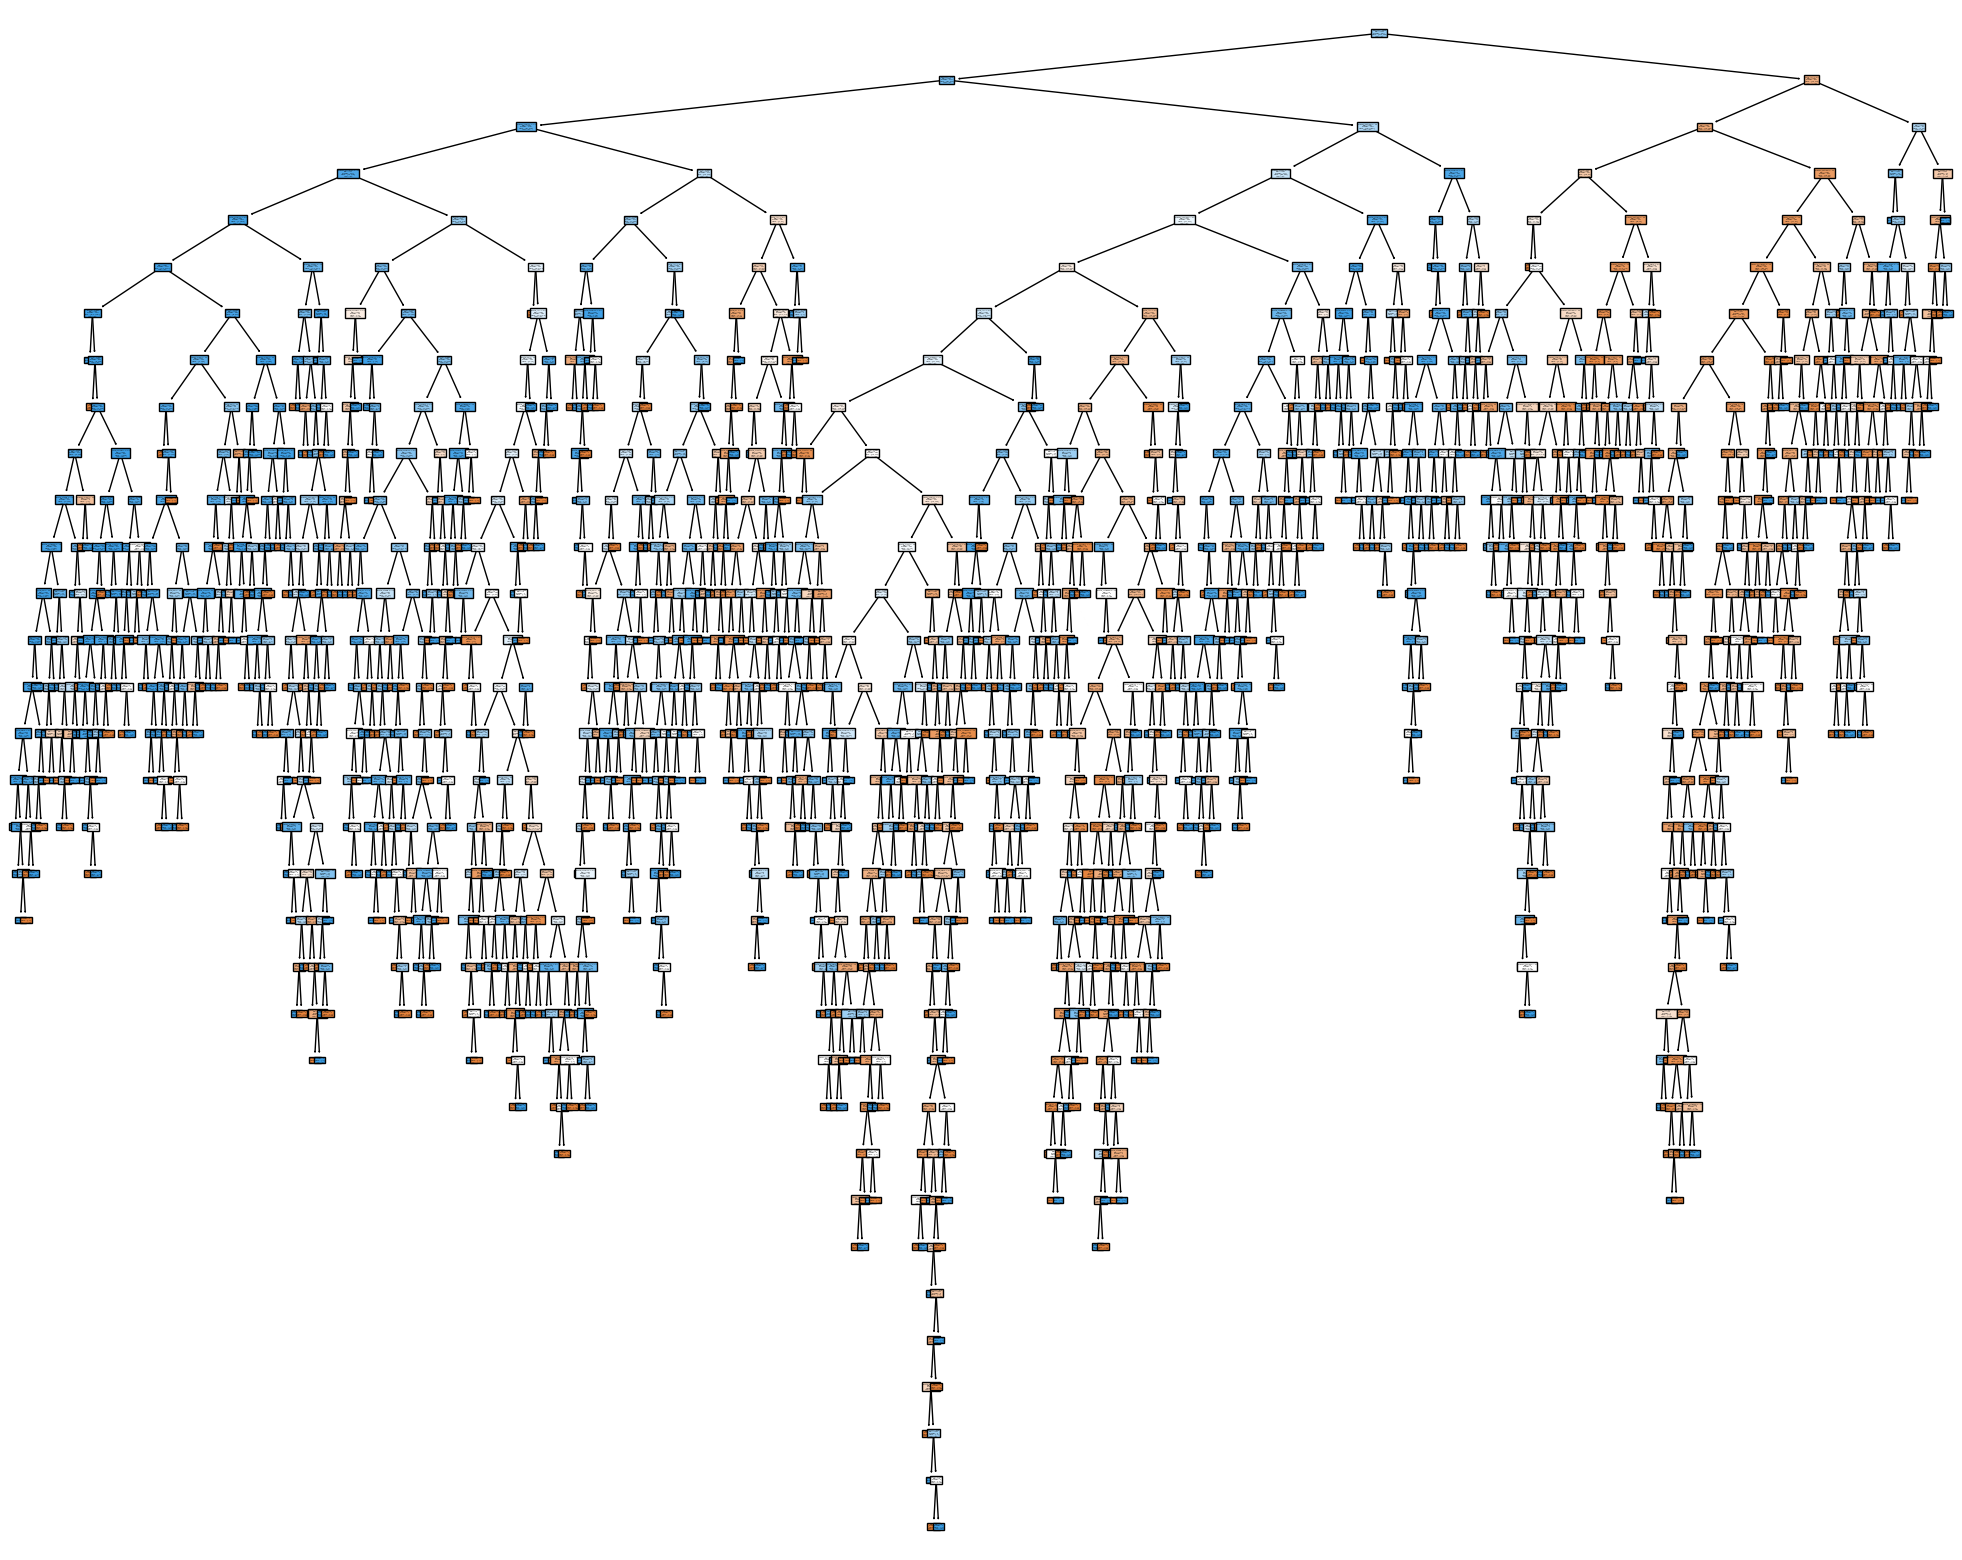

In [41]:
plt.figure(figsize=(25,20))
plot_tree(tree, feature_names=features, class_names=['on time','late'], filled=True)
plt.tight_layout
plt.savefig('decision_tree_v1.png', dpi=300, bbox_inches='tight')
plt.show()


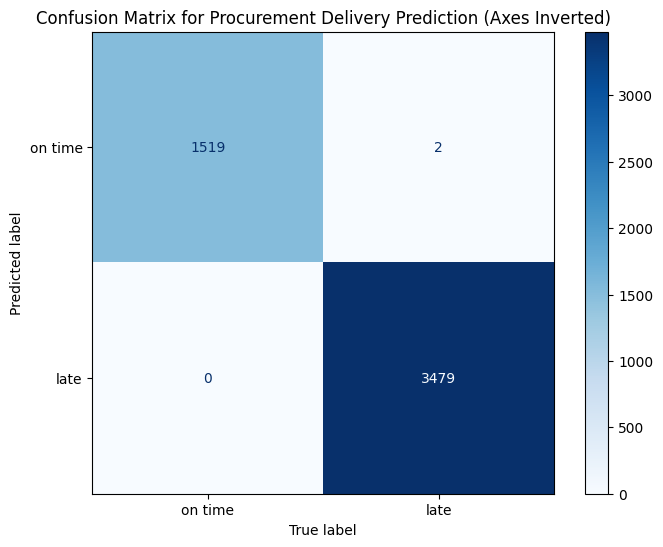

In [43]:
y_pred = tree.predict(transactions2[features])
y_true = transactions2['late']
cm = confusion_matrix(y_true, y_pred)
cm_transposed = cm.T

disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
plt.savefig('confusion_matrix_v1.png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
accuracy_score(y_true = y_true , y_pred = y_pred)

0.9996

In [45]:
recall_score(y_true = y_true , y_pred = y_pred)

0.9994254524561907

In [46]:
precision_score(y_true = y_true , y_pred = y_pred)

1.0